In [1]:

from qiskit import *

from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

# Enables inline plotting in Jupyter notebooks
%matplotlib inline


In [2]:
oracle = QuantumCircuit(2, name='oracle')
         
oracle.cz(0, 1)       # Apply CZ
           
oracle.to_gate()
oracle.draw()

q_0: ─■─
      │ 
q_1: ─■─

In [3]:
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService

In [4]:
simulator = AerSimulator()


In [5]:


grover=QuantumCircuit(2,2)
grover.h([0,1])
grover.append(oracle,[0,1])
grover.draw()

┌───┐┌─────────┐
q_0: ┤ H ├┤0        ├
     ├───┤│  oracle │
q_1: ┤ H ├┤1        ├
     └───┘└─────────┘
c: 2/════════════════

In [6]:
ref= QuantumCircuit(2, name="reflectionCircuit")
ref.h([0, 1])       # Apply Hadamard gates
ref.z([0, 1])       # Apply Pauli-Z gates
ref.cz(0, 1)        # Apply controlled-Z to invert the target
ref.h([0, 1])       # Final Hadamard gates
ref.to_gate()


Instruction(name='reflectionCircuit', num_qubits=2, num_clbits=0, params=[])

In [7]:
ref.draw()

┌───┐┌───┐   ┌───┐
q_0: ┤ H ├┤ Z ├─■─┤ H ├
     ├───┤├───┤ │ ├───┤
q_1: ┤ H ├┤ Z ├─■─┤ H ├
     └───┘└───┘   └───┘

In [8]:
grover.append(ref,[0,1])
grover.draw()

┌───┐┌─────────┐┌────────────────────┐
q_0: ┤ H ├┤0        ├┤0                   ├
     ├───┤│  oracle ││  reflectionCircuit │
q_1: ┤ H ├┤1        ├┤1                   ├
     └───┘└─────────┘└────────────────────┘
c: 2/══════════════════════════════════════

In [9]:
grover.measure([0,1],[0,1])

In [10]:


final_circuit = transpile(grover, simulator)
job = simulator.run(final_circuit, shots=1024)
result = job.result()

# Extract the result counts and plot them




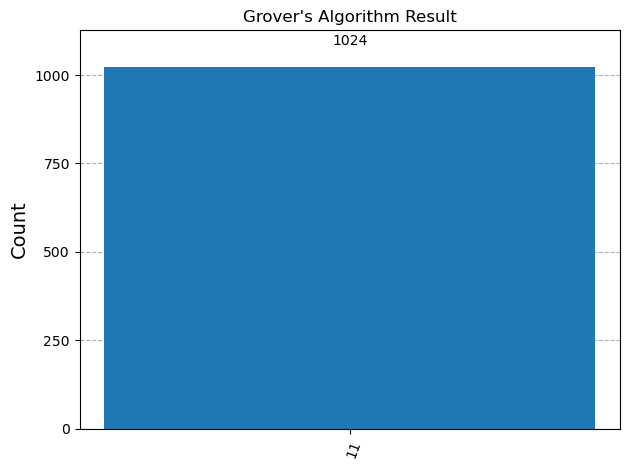

In [11]:
counts = result.get_counts()

counts
plot_histogram(counts, title="Grover's Algorithm Result")